# Semana 3: Implementación de Modelos de Machine learning


### Objetivos:
*   Explorar el uso de árboles de Decisión (supervisado)
*   Explorar el uso de random forest (supervisado)
*   Explorar el uso de máquinas de soporte vectorial (supervisado)
*   Explorar el uso de análisis de componentes principales (supervisado)
*   Explorar el uso de clustering por k-means (no supervisado)


## 1. **Análisis Exploratorio de Datos**:



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import numpy as np

# Cargar el dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')  # 0: maligno, 1: benigno

In [2]:
# Crear un DataFrame completo con características y objetivo
df = pd.concat([X, y], axis=1)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# 1. Información general del dataset
print("=== Información general del dataset ===")
print(f"Número de muestras: {df.shape[0]}")
print(f"Número de características: {df.shape[1] - 1}")
print(f"Clases objetivo: {data.target_names}")
print("\nPrimeras 5 filas del dataset:")
print(df.head())

=== Información general del dataset ===
Número de muestras: 569
Número de características: 30
Clases objetivo: ['malignant' 'benign']

Primeras 5 filas del dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4  

In [5]:
# 2. Resumen estadístico
print("\n=== Resumen estadístico de las características ===")
print(X.describe())


=== Resumen estadístico de las características ===
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.0193


=== Distribución de la variable objetivo ===
target
1    0.627417
0    0.372583
Name: proportion, dtype: float64


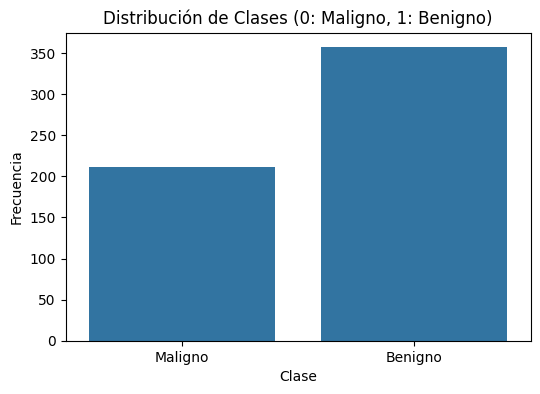

In [6]:
# 3. Distribución de la variable objetivo
print("\n=== Distribución de la variable objetivo ===")
print(y.value_counts(normalize=True))
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribución de Clases (0: Maligno, 1: Benigno)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['Maligno', 'Benigno'])
plt.show()


In [7]:
# 4. Verificación de valores faltantes
print("\n=== Valores faltantes ===")
print(X.isnull().sum().sum(), "valores faltantes en total")


=== Valores faltantes ===
0 valores faltantes en total


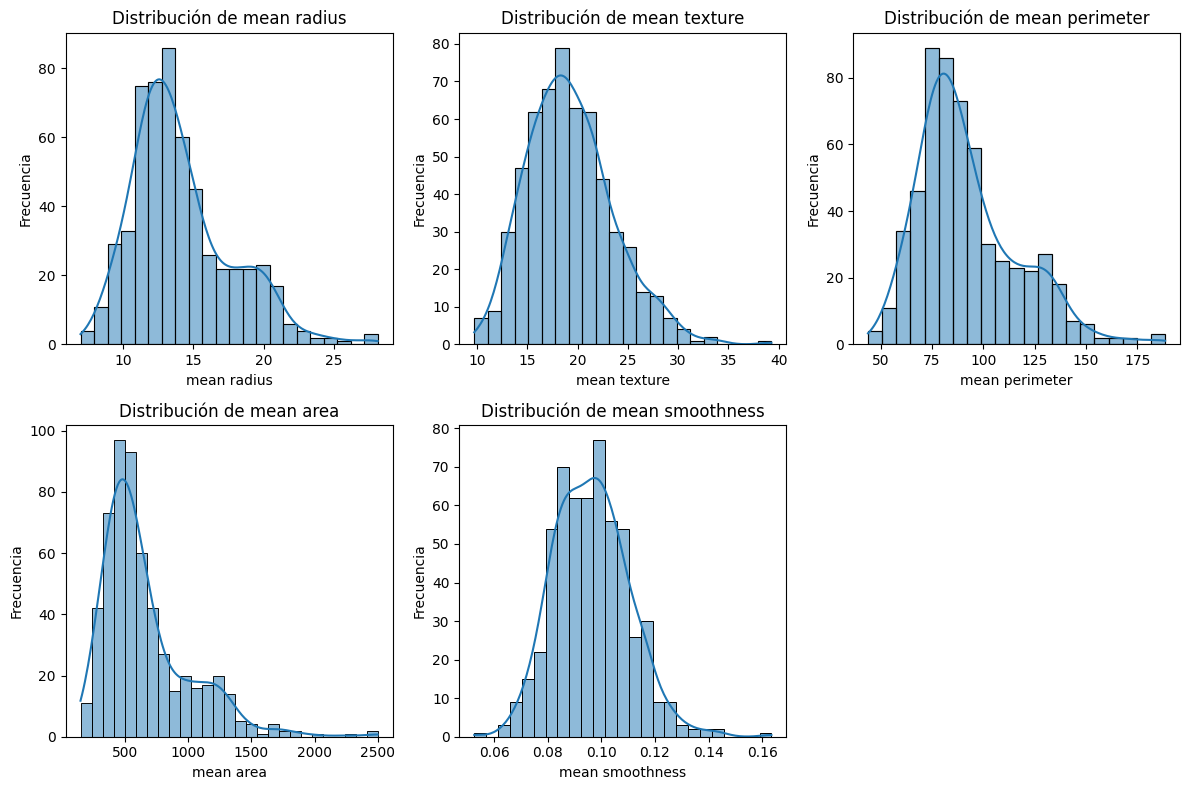

In [8]:
# 5. Distribución de algunas características (seleccionamos las primeras 5 para visualización)
plt.figure(figsize=(12, 8))
for i, col in enumerate(X.columns[:5]):
    plt.subplot(2, 3, i+1)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

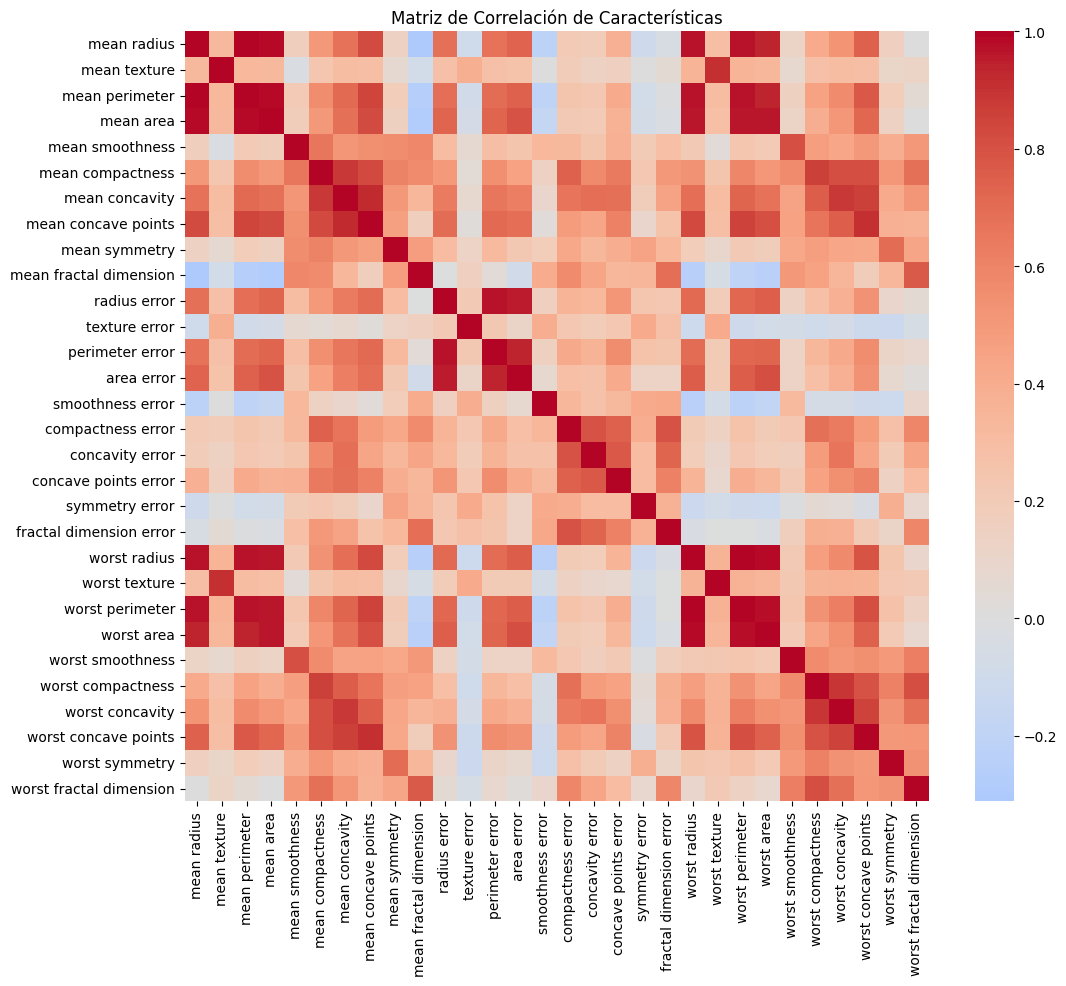

In [9]:
# 6. Correlación entre características
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Características')
plt.show()

In [10]:
# 7. Correlaciones más fuertes
print("\n=== Correlaciones más fuertes (absolutas) ===")
corr_unstack = correlation_matrix.abs().unstack()
corr_sorted = corr_unstack.sort_values(ascending=False)
corr_sorted = corr_sorted[corr_sorted < 1.0]  # Excluir correlaciones de una variable consigo misma
print(corr_sorted.head(10))


=== Correlaciones más fuertes (absolutas) ===
mean perimeter   mean radius        0.997855
mean radius      mean perimeter     0.997855
worst radius     worst perimeter    0.993708
worst perimeter  worst radius       0.993708
mean radius      mean area          0.987357
mean area        mean radius        0.987357
                 mean perimeter     0.986507
mean perimeter   mean area          0.986507
worst area       worst radius       0.984015
worst radius     worst area         0.984015
dtype: float64


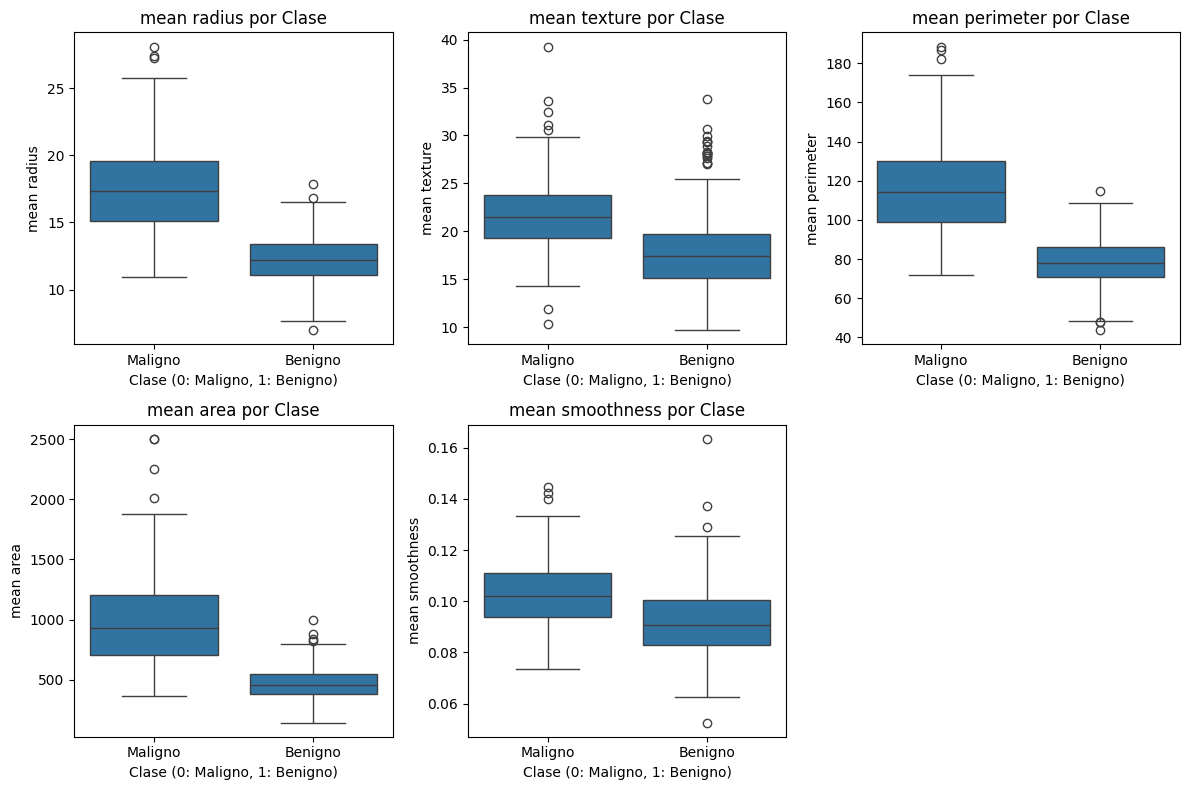

In [11]:
# 8. Boxplots de características clave por clase (seleccionamos las primeras 5 para visualización)
plt.figure(figsize=(12, 8))
for i, col in enumerate(X.columns[:5]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} por Clase')
    plt.xlabel('Clase (0: Maligno, 1: Benigno)')
    plt.xticks(ticks=[0, 1], labels=['Maligno', 'Benigno'])
plt.tight_layout()
plt.show()

## 2. Modelos:

- Árboles de Decisión
- Random Forest
- Máquinas de Vectores de Soporte
- Análisis de Componentes Principales
- Clustering K-Means


### **2.1.1. Árboles de Decisión**


#### **¿Cómo Funcionan los Árboles de Decisión?**

Los Árboles de Decisión operan haciendo una serie de preguntas sobre las características de los datos. Cada pregunta corresponde a una división en el árbol, guiando los datos por diferentes ramas hasta que se toma una decisión o predicción final en un nodo hoja.

En un Árbol de Decisión, cada nodo interno representa una prueba en una característica específica (por ejemplo, "¿El ancho del pétalo es > 1.0 cm?"). Las ramas representan los posibles resultados de esa prueba (por ejemplo, "Sí" o "No"). Los nodos hoja al final de las ramas representan la predicción final. Para la clasificación, esta predicción es la etiqueta de clase (por ejemplo, "Iris-setosa" o "Iris-versicolor"). Para la regresión, la predicción es un valor continuo (por ejemplo, un precio de vivienda previsto). La estructura similar a un diagrama de flujo de un Árbol de Decisión lo hace altamente interpretable, lo que le permite comprender fácilmente el razonamiento detrás de sus predicciones.

#### **Conceptos Matemáticos Subyacentes**

Al construir un Árbol de Decisión, el algoritmo necesita decidir en qué característica dividir en cada nodo. El objetivo es realizar divisiones que resulten en los nodos más "puros", es decir, nodos que contengan principalmente puntos de datos pertenecientes a una sola clase (para clasificación) o que tengan una baja varianza en la variable objetivo (para regresión). Entropía, Ganancia de Información e Impureza de Gini son métricas utilizadas para medir esta pureza o impureza.

**La entropía** es una medida del desorden o la aleatoriedad en un nodo. Un nodo con una mezcla de diferentes clases tiene una entropía alta, mientras que un nodo que contiene solo una clase tiene una entropía cero.

**La ganancia de información** mide la reducción de la entropía lograda después de dividir un nodo en una característica particular. El algoritmo tiene como objetivo elegir la característica que produce la mayor ganancia de información, ya que esta división separa mejor los datos en función de la variable objetivo.

**La impureza de Gini** es otra métrica que mide la probabilidad de clasificar erróneamente un elemento elegido al azar si se etiquetara de acuerdo con la distribución de clases en el nodo. Una impureza de Gini de 0 indica un nodo puro.

El algoritmo del Árbol de Decisión **selecciona iterativamente la característica que maximiza la Ganancia de Información o minimiza la Impureza de Gini para dividir los datos en cada nodo**, con el objetivo de crear un árbol que clasifique o prediga eficazmente la variable objetivo. Estas métricas proporcionan una forma matemática de determinar las "mejores" preguntas para hacer en cada paso de la construcción del árbol, asegurando que las divisiones sean informativas y conduzcan a predicciones precisas.

#### **Supuestos Clave de los Árboles de Decisión**

Un supuesto fundamental de los algoritmos básicos de Árboles de Decisión (como ID3) es que se prefiere que los valores de las características sean categóricos. Si los valores son continuos, a menudo se discretizan en categorías antes de construir el modelo. Sin embargo, las implementaciones modernas como el algoritmo CART (utilizado en scikit-learn) pueden manejar características numéricas directamente encontrando puntos de división óptimos.

Otro supuesto es que todo el conjunto de entrenamiento se considera inicialmente como el nodo raíz. Luego, el árbol crece dividiendo recursivamente esta raíz en subárboles en función de los valores de los atributos.

Los Árboles de Decisión también suponen que los registros se distribuyen recursivamente en función de los valores de los atributos.

El orden en que los atributos se colocan como raíz o nodos internos se determina utilizando enfoques estadísticos como la Ganancia de Información o la Impureza de Gini.

#### **Para verificar la idoneidad de su conjunto de datos para los Árboles de Decisión**

1. Para las características categóricas, utilice value_counts() en Pandas para ver la distribución de las categorías. Las distribuciones muy sesgadas podrían afectar el equilibrio del árbol.

2. Para las características numéricas, utilice histogramas (por ejemplo, con matplotlib.pyplot.hist()) para visualizar su distribución. Los Árboles de Decisión pueden manejar varias distribuciones, pero siempre es útil comprender la dispersión de los datos.

3. Considere las relaciones entre las características. Si bien los Árboles de Decisión pueden capturar relaciones no lineales, las características altamente correlacionadas podrían conducir a divisiones redundantes. Puede verificar la correlación utilizando una matriz de correlación (por ejemplo, df.corr() en Pandas) y un mapa de calor.

4. Si bien la implementación del Árbol de Decisión de scikit-learn es bastante flexible, comprender estos supuestos subyacentes puede ayudar a interpretar el modelo y potencialmente mejorar su rendimiento mediante la ingeniería de características o eligiendo algoritmos alternativos si los supuestos se violan gravemente.



#### **Resumen**

Los árboles de decisión dividen los datos en subconjuntos basados en características, maximizando la pureza de cada nodo.

#### a. **Impureza de Gini**

Mide la probabilidad de clasificar incorrectamente una observación si se elige una clase al azar.

$Gini(D) = 1 - ∑_{i=1}^{k} p_i^2$

Donde:

D: conjunto de datos en un nodo.

$p_i$: proporción de muestras de la clase i en el nodo.

#### b. **Ganancia de Información (Information Gain)**

Elije la característica que mejor divide los datos:

$Gain(D,A) = Impureza(D) - ∑_{v∈Valores(A)} \frac{|D_v|}{|D|} \cdot Impureza(D_v)$

$A$: característica evaluada.

$D_v$: subconjunto de datos con valor v en la característica A.


=== Importancia de las características (Árbol de Decisión) ===
worst radius            0.695594
worst concave points    0.107097
worst texture           0.083728
concavity error         0.031841
worst smoothness        0.014405
mean compactness        0.012530
mean texture            0.011277
worst area              0.011086
area error              0.009361
mean concave points     0.008771
dtype: float64


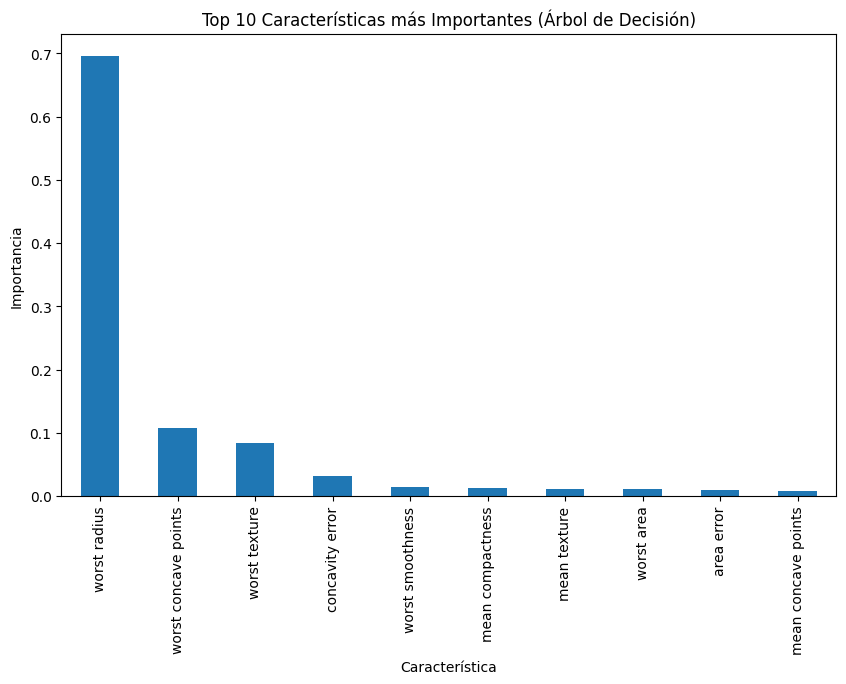

In [12]:
# Características más importantes según un árbol de decisión simple
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

feature_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n=== Importancia de las características (Árbol de Decisión) ===")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
feature_importance[:10].plot(kind='bar')
plt.title('Top 10 Características más Importantes (Árbol de Decisión)')
plt.xlabel('Característica')
plt.ylabel('Importancia')
plt.show()

Cómo funciona dt.feature_importances_:

1. Los árboles de decisión asignan un valor de importancia a cada característica basado en cuánto contribuye cada una a reducir la impureza (por ejemplo, el índice de Gini) en los nodos del árbol.

2. La importancia se calcula sumando la reducción de impureza ponderada por la proporción de muestras que pasan por cada nodo donde se usa la característica.

3. Los valores están normalizados para que sumen 1 (es decir, son proporciones relativas).

Ejemplo: Si worst radius tiene una importancia de 0.7, significa que contribuye con el 7% de la capacidad del árbol para separar las clases.



In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Cargar el conjunto de datos de cáncer de mama
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Variable objetivo (0: maligno, 1: benigno)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# Crear un objeto clasificador de Árbol de Decisión
dt_classifier = DecisionTreeClassifier(random_state=20)

# Entrenar el clasificador
dt_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = dt_classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.9181


### **2.1.2. Random Forest: Construyendo sobre Árboles de Decisión**


#### **¿Cómo Funcionan los Random Forest**

Un Random Forest es como tener una colección (o "bosque") de muchos Árboles de Decisión trabajando juntos para hacer una predicción. En lugar de depender de la predicción de un solo Árbol de Decisión, el Random Forest agrega las predicciones de múltiples árboles para llegar a un resultado más robusto y preciso.

La idea central detrás de Random Forest es una técnica de aprendizaje de conjunto llamada **Bagging**, que significa Bootstrap Aggregating. Así es como funciona:

1. **Muestreo Bootstrap**: El algoritmo Random Forest crea múltiples subconjuntos de los datos de entrenamiento originales mediante un muestreo aleatorio con reemplazo. Esto significa que algunos puntos de datos pueden incluirse varias veces en un subconjunto, mientras que otros pueden omitirse.

2. **Selección Aleatoria de Características**: Al construir cada Árbol de Decisión en el bosque, el algoritmo selecciona aleatoriamente solo un subconjunto de las características disponibles para considerar la división en cada nodo. Esto introduce una mayor diversidad entre los árboles.

3. **Construcción Independiente de Árboles**: Cada Árbol de Decisión en el bosque se construye de forma independiente en su propia muestra bootstrap y utilizando el subconjunto de características seleccionado aleatoriamente.

4. **Agregación de Predicciones**: Al realizar una predicción para un nuevo punto de datos, cada árbol en el bosque realiza su propia predicción. Para las tareas de clasificación, el Random Forest toma un voto mayoritario (la clase predicha por la mayoría de los árboles es la predicción final). Para las tareas de regresión, promedia las predicciones de todos los árboles.

Al **introducir aleatoriedad** tanto en el muestreo de datos como en la selección de características, los Random Forest **reducen** la tendencia de los Árboles de Decisión individuales a **sobreajustar los datos de entrenamiento**, lo que lleva a una mejor generalización y una mayor precisión en los datos no vistos.



#### **Conceptos Matemáticos Subyacentes**

El principio matemático detrás de la efectividad de combinar múltiples árboles en un Random Forest radica en la **reducción de la varianza**. Se sabe que los **Árboles de Decisión individuales** son modelos de "alta varianza", lo que significa que sus predicciones pueden **cambiar significativamente con pequeñas variaciones en los datos de entrenamiento**.


Al **promediar las predicciones (para la regresión)** o **tomar un voto mayoritario o la moda (para la clasificación)** de muchos árboles entrenados de forma independiente, el **Random Forest suaviza efectivamente estas variaciones individuales**, lo que resulta en una predicción más estable y confiable. Si bien el sesgo (el error de las suposiciones demasiado simplistas en el algoritmo de aprendizaje) del Random Forest es similar al de un solo Árbol de Decisión, la reducción significativa de la varianza a menudo conduce a un rendimiento general mucho mejor.

#### **Supuestos Clave de los Árboles de Decisión**

Al igual que los Árboles de Decisión, los Random Forest funcionan bien con **datos que tienen valores reales** (No NaN ni estandarizados) en las variables de características. Si faltan en gran medida valores de características o no tienen sentido, es probable que los árboles construidos sobre estos datos no sean confiables.

Un supuesto clave que distingue a los Random Forest es que **las predicciones de cada árbol individual deben tener correlaciones muy bajas**. La aleatoriedad introducida a través del muestreo bootstrap y la selección aleatoria de características durante la construcción del árbol ayuda a garantizar esta baja correlación. Si los árboles están altamente correlacionados (por ejemplo, si las características fuertes dominan consistentemente las divisiones en cada árbol), el beneficio del ensamble disminuye.

Los Random Forest también suponen que **no hay una fuerte multicolinealidad** (alta correlación entre las características) en el conjunto de datos. Si bien la selección aleatoria de características ayuda a mitigar el impacto de algunas características correlacionadas, una **multicolinealidad muy alta aún puede afectar la eficiencia e interpretabilidad del modelo**.

Al igual que los Árboles de Decisión, los Random Forest **pueden manejar eficazmente relaciones no lineales en los datos**  sin requerir transformaciones explícitas de las características.

La **eficacia de un Random Forest depende en gran medida de la diversidad de los árboles individuales**. Asegurar una baja correlación entre sus predicciones es crucial para lograr ganancias de rendimiento significativas sobre un solo Árbol de Decisión.

#### **Para verificar la idoneidad de su conjunto de datos para los Árboles de Decisión**

1. Para las características categóricas, utilice value_counts() en Pandas para ver la distribución de las categorías. Las distribuciones muy sesgadas podrían afectar el equilibrio del árbol.

2. Para las características numéricas, utilice histogramas (por ejemplo, con matplotlib.pyplot.hist()) para visualizar su distribución. Los Árboles de Decisión pueden manejar varias distribuciones, pero siempre es útil comprender la dispersión de los datos.

3. Considere las relaciones entre las características. Si bien los Árboles de Decisión pueden capturar relaciones no lineales, las características altamente correlacionadas podrían conducir a divisiones redundantes. Puede verificar la correlación utilizando una matriz de correlación (por ejemplo, df.corr() en Pandas) y un mapa de calor.

4. Si bien la implementación del Árbol de Decisión de scikit-learn es bastante flexible, comprender estos supuestos subyacentes puede ayudar a interpretar el modelo y potencialmente mejorar su rendimiento mediante la ingeniería de características o eligiendo algoritmos alternativos si los supuestos se violan gravemente.



#### **Resumen**

Combina múltiples árboles de decisión mediante bagging (bootstrap aggregation).

#### a. **Media o Votación Mayoritaria**

Mide la probabilidad de clasificar incorrectamente una observación si se elige una clase al azar.

Para regresión:

$\hat{y} = \frac{1}{T} \sum_{t=1}^{T} y_t$

Para clasificación:

$\hat{y} = \text{moda}(y_1, y_2, \dots, y_T)$

Donde:

$T$: número de árboles.

$y_t$: predicción del árbol t.

In [14]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Cargar el conjunto de datos de cáncer de mama
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Variable objetivo (0: maligno, 1: benigno)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


# Crear un objeto clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=50)

# Entrenar el clasificador
rf_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.9591


### **2.1.3. Máquinas de Vectores de Soporte (SVM): Encontrando el Límite Óptimo**


#### **¿Cómo Funcionan las Máquinas de Vectores de Soporte?**

La idea fundamental detrás de SVM para clasificación es **encontrar la mejor línea** (o en dimensiones superiores, un hiperplano) que **separe los puntos de datos pertenecientes a diferentes clases** con la **mayor brecha posible entre ellos**. Esta brecha se llama margen. Los **puntos de datos que se encuentran más cerca de este hiperplano óptimo se denominan vectores de soporte**. Estos vectores de soporte son cruciales ya que definen la posición y la orientación del hiperplano.

**Para la regresión**, conocida como Regresión de Vectores de Soporte (SVR), SVM utiliza principios similares. **En lugar de encontrar un hiperplano que separe las clases**, SVR tiene como objetivo **encontrar una función** que **mejor se ajuste a los valores de salida continuos dentro de un cierto margen de error (a menudo denominado tubo épsilon)**. El objetivo es que tantos puntos de datos como sea posible se encuentren dentro de este margen alrededor de la función predicha.

El enfoque en **maximizar el margen en la clasificación hace que las SVM sean robustas a datos nuevos y no vistos**, ya que crea una separación clara entre las clases. En la regresión, el concepto de tubo épsilon proporciona flexibilidad en el ajuste de los datos.


#### **Conceptos Matemáticos Subyacentes**

Matemáticamente, el objetivo de un clasificador SVM es **encontrar el hiperplano** que no solo **separa las clases**, sino que también **maximiza la distancia desde el hiperplano** hasta los puntos de datos más cercanos de cualquier clase **(los vectores de soporte)**. Esto se logra definiendo un vector de peso (w) que es perpendicular al hiperplano y un término de sesgo (b) que determina el desplazamiento del hiperplano desde el origen. Luego, el algoritmo intenta encontrar los valores de w y b que satisfagan las restricciones de clasificación (clasificar correctamente todos los datos de entrenamiento) al tiempo que maximizan la magnitud del margen, que es inversamente proporcional a la magnitud del vector de peso (w).



#### **Supuestos Clave de los SVM**

1. Las SVM suponen que los **puntos de datos son independientes e idénticamente distribuidos (i.i.d.)**. Esta es una suposición común en muchos algoritmos de aprendizaje automático.

2. Una de las fortalezas de las **SVM es su efectividad en espacios de alta dimensión**, incluso cuando el número de dimensiones es mayor que el número de muestras.

3. La SVM lineal funciona mejor cuando los datos son linealmente separables, lo que significa que las diferentes clases pueden separarse perfectamente mediante una línea recta (en 2D) o un hiperplano (en dimensiones superiores).

Sin embargo, los datos del mundo real a menudo no son linealmente separables. Para manejar tales casos, las SVM utilizan una técnica poderosa llamada truco del kernel. Las funciones kernel mapean los datos originales a un espacio de mayor dimensión donde se vuelven linealmente separables. Las funciones kernel comunes incluyen:

a. **Kernel Lineal**: Equivalente a una SVM lineal sin ninguna transformación.

b. **Kernel Polinómico**: Introduce no linealidad al considerar combinaciones polinómicas de las características.

c. **Kernel de Función de Base Radial (RBF)**: Un kernel muy popular que puede manejar límites no lineales complejos mapeando los datos a un espacio de dimensión infinita.

d. **Kernel Sigmoide**: Similar a la función de activación de una red neuronal.

El truco del kernel es una razón clave de la versatilidad y el poder de las SVM, lo que les permite abordar una amplia gama de problemas de clasificación y regresión, incluso aquellos con relaciones complejas y no lineales entre las características.

#### **Resumen**

Encuentra un hiperplano que maximiza el margen entre clases.

#### a. **Función de Decisión Lineal**

$f(x) = \text{sign}(w \cdot x + b)$

Donde:

$w$: vector de pesos (perpendicular al hiperplano).

$b$: sesgo (intercepto).

$x$: características de entrada.

#### b. **Optimización de Margen**

Minimiza: $\frac{1}{2} \|w\|^2$

Sujeto a: $y_i (w \cdot x_i + b) \geq 1 \quad \forall i$

Donde:  
- $y_i \in \{-1, 1\}$: etiquetas de clase.  
- Los puntos en la frontera son **vectores de soporte**.

#### c. **Kernel Trick (Ejemplo: RBF)**

$K(x, x') = \exp(-\gamma \|x - x'\|^2)$

Donde:  
- $\gamma$: parámetro de escala del kernel.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

# Set random seed for reproducibility
np.random.seed(42)

# Load breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train SVM classifiers (Linear and RBF kernels)
svm_linear = svm.SVC(kernel='linear', random_state=42)
svm_rbf = svm.SVC(kernel='rbf', random_state=42)

svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluate models
def print_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")

print_metrics(y_test, y_pred_linear, "Linear SVM")
print_metrics(y_test, y_pred_rbf, "RBF SVM")

# Cross-validation scores
cv_scores_linear = cross_val_score(svm_linear, X_train_scaled, y_train, cv=5)
cv_scores_rbf = cross_val_score(svm_rbf, X_train_scaled, y_train, cv=5)
print(f"\nLinear SVM CV Scores: {cv_scores_linear.mean():.4f} (±{cv_scores_linear.std() * 2:.4f})")
print(f"RBF SVM CV Scores: {cv_scores_rbf.mean():.4f} (±{cv_scores_rbf.std() * 2:.4f})")




Linear SVM Metrics:
Accuracy: 0.9766
Precision: 0.9815
Recall: 0.9815
F1-Score: 0.9815

RBF SVM Metrics:
Accuracy: 0.9766
Precision: 0.9815
Recall: 0.9815
F1-Score: 0.9815

Linear SVM CV Scores: 0.9748 (±0.0320)
RBF SVM CV Scores: 0.9673 (±0.0344)


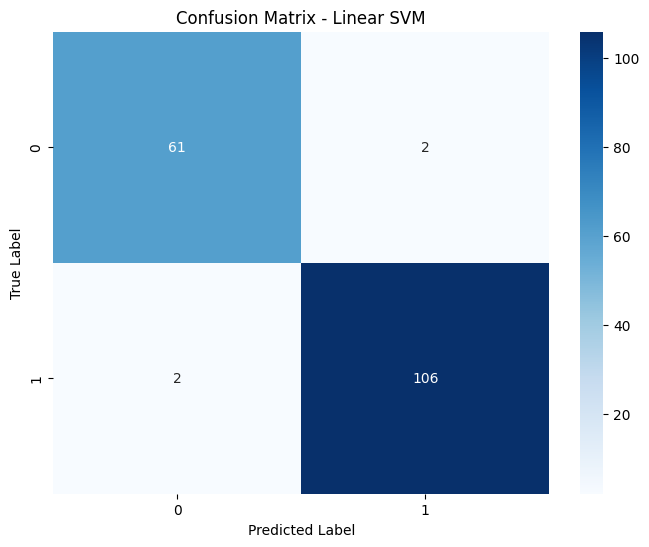

In [18]:
# Plot confusion matrix for Linear SVM
cm = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Linear SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_linear_svm.png')




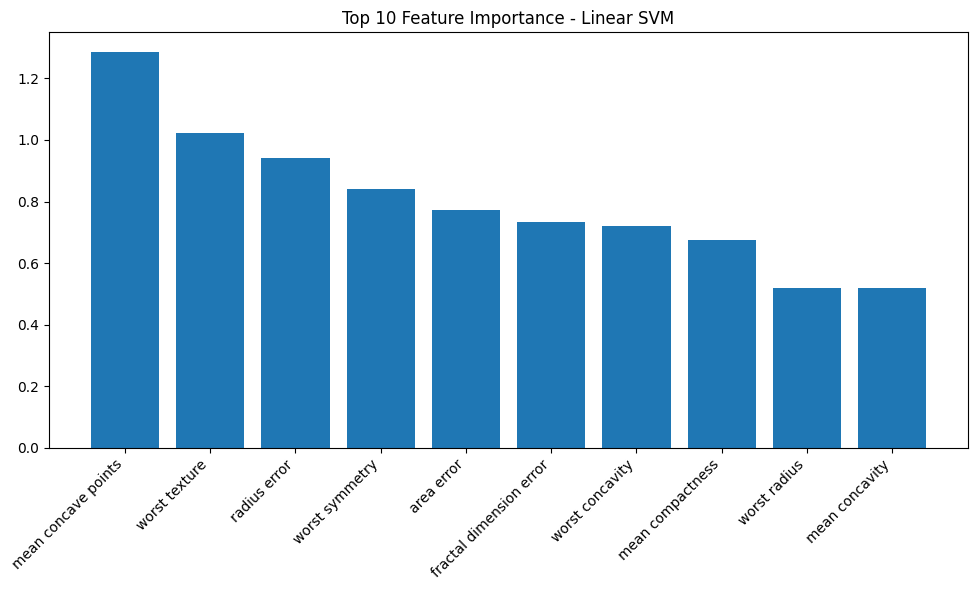

In [19]:
# Plot feature importance for Linear SVM
coef = np.abs(svm_linear.coef_[0])
feature_importance = sorted(zip(coef, feature_names), reverse=True)[:10]
coef_values, feature_names_top = zip(*feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(feature_names_top, coef_values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Importance - Linear SVM')
plt.tight_layout()
plt.savefig('feature_importance_linear_svm.png')


Error cuadrático medio: 0.18329205077272803


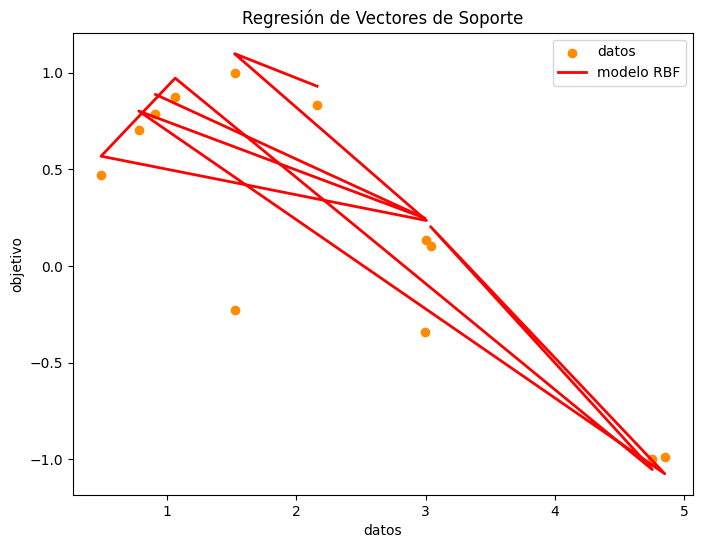

In [20]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generar datos de muestra
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un objeto regresor SVR con un kernel RBF
svr_regressor = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Entrenar el regresor
svr_regressor.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = svr_regressor.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='darkorange', label='datos')
plt.plot(X_test, y_pred, color='red', lw=2, label='modelo RBF')
plt.xlabel('datos')
plt.ylabel('objetivo')
plt.title('Regresión de Vectores de Soporte')
plt.legend()
plt.show()

### **2.1.4. Análisis de Componentes Principales (PCA): Reducción de Dimensionalidad**


#### **¿Cómo funciona PCA?**

**PCA** logra esto transformando las características originales en un nuevo conjunto de características no correlacionadas llamadas componentes principales (CP). Estos componentes principales se ordenan según la cantidad de varianza que explican en los datos. El primer componente principal captura la mayor varianza, el segundo captura la siguiente mayor, y así sucesivamente. PCA ayuda a simplificar conjuntos de datos complejos identificando los patrones subyacentes más importantes, lo que puede ser útil para la visualización, la aceleración de los algoritmos de aprendizaje automático y la reducción del ruido


#### **Conceptos Matemáticos Subyacentes**

En esencia, PCA implica encontrar las direcciones en los datos que tienen la mayor dispersión. Estas direcciones están representadas por vectores propios. La importancia o la cantidad de varianza explicada por cada vector propio viene dada por su correspondiente valor propio. Una mayor valor propio significa que el vector propio correspondiente (componente principal) captura más varianza de los datos. La Relación de Varianza Explicada es la proporción de la varianza total en el conjunto de datos que es explicada por cada componente principal. Al examinar los valores propios y la relación de varianza explicada, puede determinar cuántos componentes principales se necesitan para conservar una cantidad significativa de información de los datos originales.


#### **Supuestos Clave de los PCA**


#### **Resumen**

Reduce dimensionalidad proyectando datos en direcciones de máxima varianza.

#### a. **Matriz de Covarianza**

$\Sigma = \frac{1}{n-1} X^T X$

Donde:

- $X$: datos centrados (media 0).

#### b. **Autovectores y Autovalores**

Encuentra $\lambda$ y $v$ tales que:  
$\Sigma v$ = $\lambda v$

Donde:  
- Los autovectores v son las **componentes principales**.  
- Los autovalores \lambda representan la **varianza explicada**.

#### c. **Proyección**

$Y = X \cdot V_k$

Donde:  
- $V_k$: matriz con los primeros k autovectores.

<ipython-input-21-0a0786d9092e>:31: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title='Clases', labels=['Maligno', 'Benigno'])


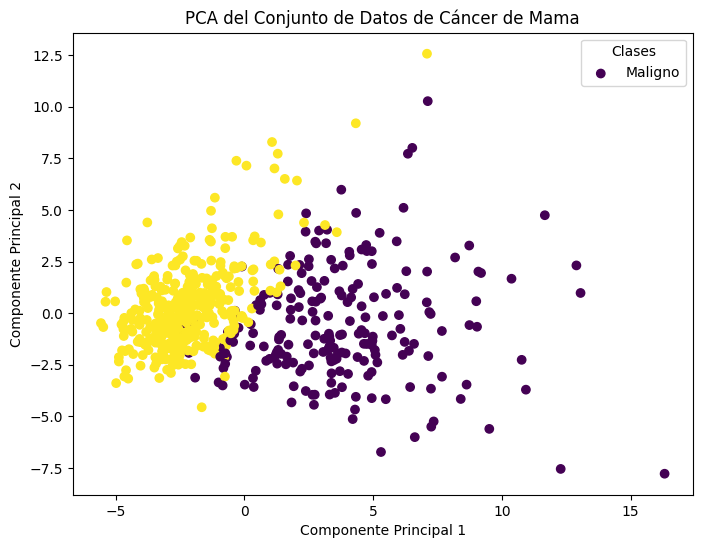

Relación de Varianza Explicada: [0.44272026 0.18971182]
Porcentaje de varianza explicada por PC1: 44.27%
Porcentaje de varianza explicada por PC2: 18.97%
Varianza total explicada: 63.24%


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos de cáncer de mama
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2) # 3 4 5
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame para los componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2']) # PC3 PC4 PC5
pca_df['target'] = y

# Visualizar los resultados
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['target'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA del Conjunto de Datos de Cáncer de Mama')
plt.legend(*scatter.legend_elements(), title='Clases', labels=['Maligno', 'Benigno'])
plt.show()

# Relación de varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Relación de Varianza Explicada: {explained_variance_ratio}")
print(f"Porcentaje de varianza explicada por PC1: {explained_variance_ratio[0]*100:.2f}%")
print(f"Porcentaje de varianza explicada por PC2: {explained_variance_ratio[1]*100:.2f}%")
print(f"Varianza total explicada: {sum(explained_variance_ratio)*100:.2f}%")


=== Composición de los Componentes Principales (Loadings) ===
                              PC1       PC2
mean radius              0.218902 -0.233857
mean texture             0.103725 -0.059706
mean perimeter           0.227537 -0.215181
mean area                0.220995 -0.231077
mean smoothness          0.142590  0.186113
mean compactness         0.239285  0.151892
mean concavity           0.258400  0.060165
mean concave points      0.260854 -0.034768
mean symmetry            0.138167  0.190349
mean fractal dimension   0.064363  0.366575
radius error             0.205979 -0.105552
texture error            0.017428  0.089980
perimeter error          0.211326 -0.089457
area error               0.202870 -0.152293
smoothness error         0.014531  0.204430
compactness error        0.170393  0.232716
concavity error          0.153590  0.197207
concave points error     0.183417  0.130322
symmetry error           0.042498  0.183848
fractal dimension error  0.102568  0.280092
worst radius 

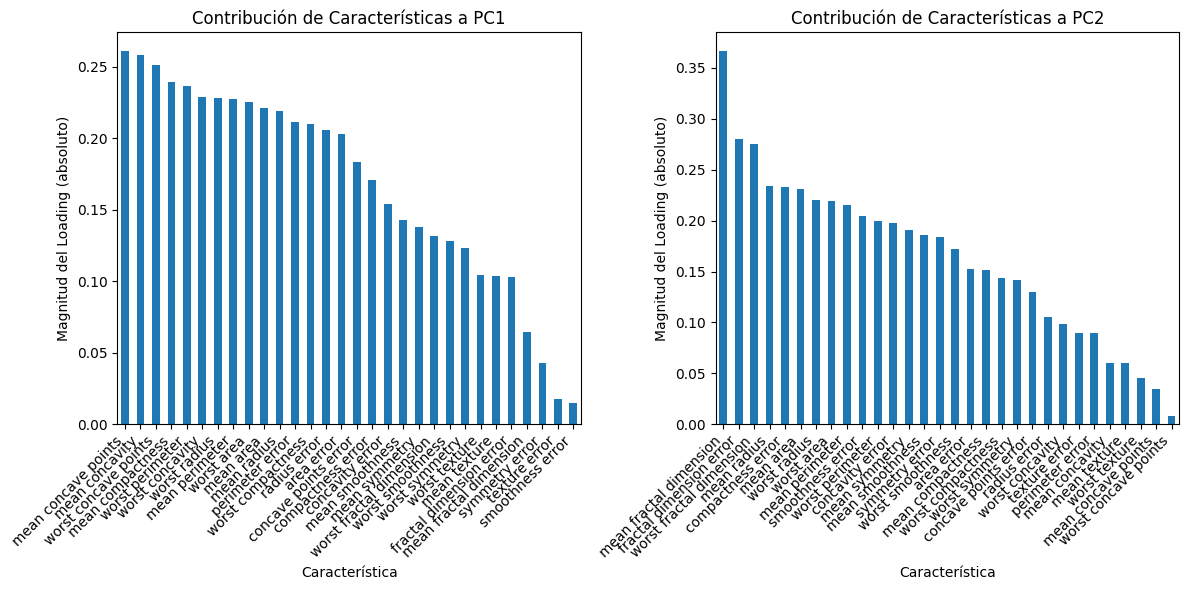


=== Top 5 características con mayor contribución a PC1 ===
mean concave points     0.260854
mean concavity          0.258400
worst concave points    0.250886
mean compactness        0.239285
worst perimeter         0.236640
Name: PC1, dtype: float64

=== Top 5 características con mayor contribución a PC2 ===
mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
mean radius                0.233857
compactness error          0.232716
Name: PC2, dtype: float64


In [22]:
# Composición de los componentes principales
# Obtener los vectores de carga (loadings) de las características
loadings = pd.DataFrame(pca.components_.T, index=cancer.feature_names, columns=['PC1', 'PC2'])

# Mostrar los loadings
print("\n=== Composición de los Componentes Principales (Loadings) ===")
print(loadings)

# Visualizar la contribución de las características a PC1 y PC2
plt.figure(figsize=(12, 6))

# Gráfico de barras para PC1
plt.subplot(1, 2, 1)
loadings['PC1'].abs().sort_values(ascending=False).plot(kind='bar')
plt.title('Contribución de Características a PC1')
plt.xlabel('Característica')
plt.ylabel('Magnitud del Loading (absoluto)')
plt.xticks(rotation=45, ha='right')

# Gráfico de barras para PC2
plt.subplot(1, 2, 2)
loadings['PC2'].abs().sort_values(ascending=False).plot(kind='bar')
plt.title('Contribución de Características a PC2')
plt.xlabel('Característica')
plt.ylabel('Magnitud del Loading (absoluto)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Identificar las características más influyentes
print("\n=== Top 5 características con mayor contribución a PC1 ===")
print(loadings['PC1'].abs().sort_values(ascending=False).head(5))
print("\n=== Top 5 características con mayor contribución a PC2 ===")
print(loadings['PC2'].abs().sort_values(ascending=False).head(5))

Clustering K-Means: Agrupando Puntos de Datos Similares


### **2.1.5. Clustering K-Means: Agrupando Puntos de Datos Similares**


#### **¿Cómo funciona K-Means?**

**K-Means** funciona identificando 'K' centroides, que son puntos representativos para cada clúster. El algoritmo sigue un proceso iterativo:

1. **Inicialización**: Se eligen inicialmente 'K' centroides al azar (o utilizando un método más sofisticado como K-Means++).
Asignación: Cada punto de datos en el conjunto de datos se asigna al clúster cuyo centroide está más cerca, generalmente utilizando la distancia euclidiana.
2. **Actualización**: Los centroides de los clústeres se recalculan como la media de todos los puntos de datos asignados a ese clúster.

3. **Iteración**: Los pasos 2 y 3 se repiten hasta que los centroides ya no cambian significativamente o se alcanza un número predefinido de iteraciones.

K-Means tiene como objetivo agrupar puntos de datos similares, revelando estructuras o segmentos subyacentes en los datos.

#### **Conceptos Matemáticos Subyacentes**

Matemáticamente, el objetivo del algoritmo **K-Means** es minimizar la **suma de errores cuadráticos dentro del clúster (inercia)**. La inercia **mide la suma de las distancias cuadradas entre cada punto de datos y el centroide de su clúster más cercano**. Un valor de inercia más bajo indica que los puntos de datos están más agrupados dentro de sus respectivos clústeres


#### **Supuestos Clave de los PCA**

**K-Means** asume que los clústeres son esféricos y tienen un tamaño similar. También supone que todos los clústeres tienen la misma varianza. El algoritmo es sensible a los valores atípicos. Además, K-Means funciona mejor con datos numéricos y puede requerir escalado para garantizar que las características con valores más grandes no dominen el proceso de clustering

#### **Resumen**

Reduce dimensionalidad proyectando datos en direcciones de máxima varianza.

#### a. **Función de Costo (Inercia)**

$J = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2$

Donde:  
- $C_i$: cluster i.  
- $\mu_i$: centroide de C_i.

#### b. **Distancia Euclidiana**

$d(x, \mu_i) = \sqrt{\sum_{j=1}^{d} (x_j - \mu_{ij})^2}$

Donde:  
- $d$: número de características.

In [23]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

# Generar datos de muestra

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Crear un DataFrame para facilitar el análisis
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['True_Cluster'] = y  # Etiquetas verdaderas de los clústeres

# 1. Información general del dataset
print("=== Información general del dataset ===")
print(f"Número de muestras: {df.shape[0]}")
print(f"Número de características: {df.shape[1] - 1}")
print(f"Clústeres verdaderos: {np.unique(y)}")

=== Información general del dataset ===
Número de muestras: 300
Número de características: 2
Clústeres verdaderos: [0 1 2 3]


In [24]:
# 2. Resumen estadístico
print("\n=== Resumen estadístico ===")
print(df[['Feature_1', 'Feature_2']].describe())


=== Resumen estadístico ===
        Feature_1   Feature_2
count  300.000000  300.000000
mean    -0.006328    3.967821
std      1.636000    2.593963
min     -3.122407   -0.765892
25%     -1.498837    1.916025
50%     -0.044497    3.529012
75%      1.433350    5.607633
max      3.437618    9.282932



=== Distribución de los clústeres verdaderos ===
True_Cluster
1    0.25
3    0.25
0    0.25
2    0.25
Name: proportion, dtype: float64


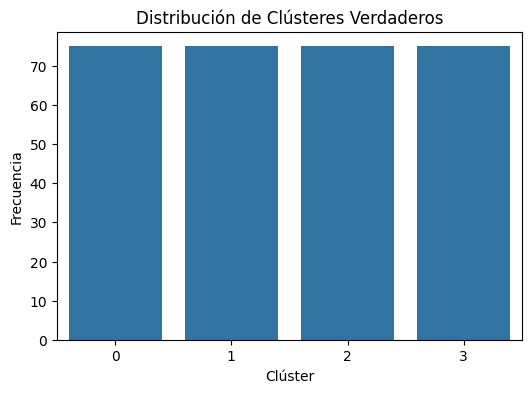

In [25]:
# 3. Distribución de los clústeres verdaderos
print("\n=== Distribución de los clústeres verdaderos ===")
print(df['True_Cluster'].value_counts(normalize=True))
plt.figure(figsize=(6, 4))
sns.countplot(x='True_Cluster', data=df)
plt.title('Distribución de Clústeres Verdaderos')
plt.xlabel('Clúster')
plt.ylabel('Frecuencia')
plt.show()

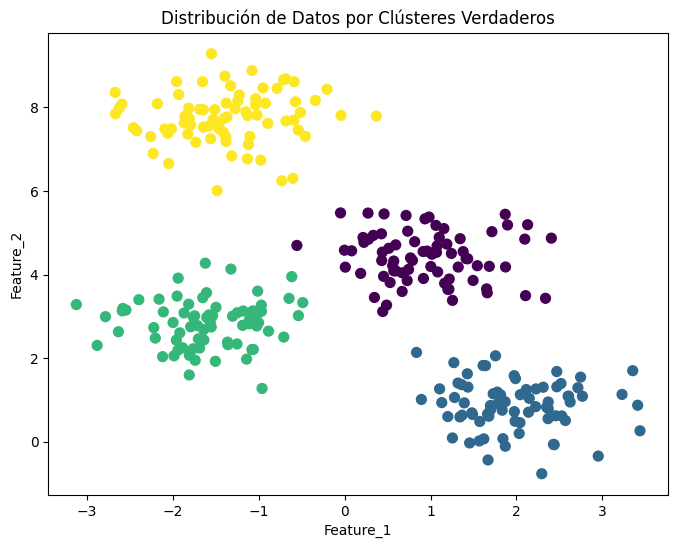

In [26]:
# 4. Visualización de las características (dispersión con clústeres verdaderos)
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['True_Cluster'], cmap='viridis', s=50)
plt.title('Distribución de Datos por Clústeres Verdaderos')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.show()


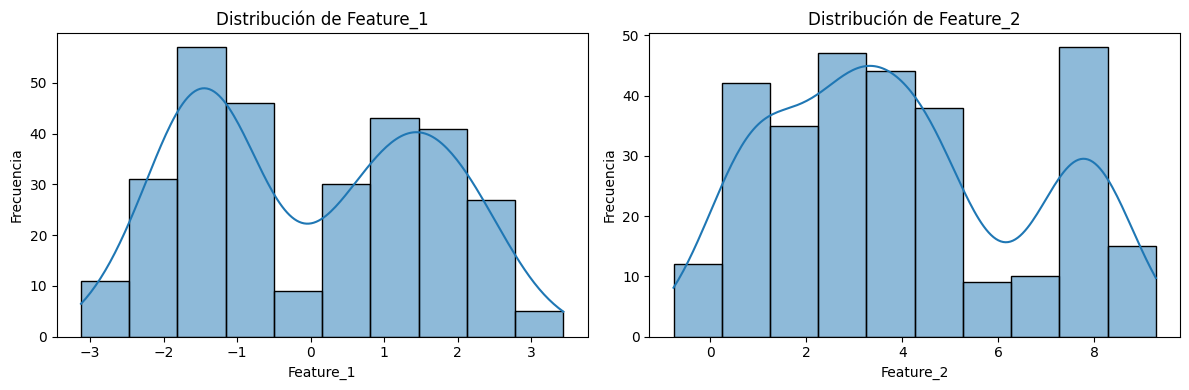

In [27]:
# 5. Distribuciones de las características
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Feature_1'], kde=True)
plt.title('Distribución de Feature_1')
plt.xlabel('Feature_1')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df['Feature_2'], kde=True)
plt.title('Distribución de Feature_2')
plt.xlabel('Feature_2')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

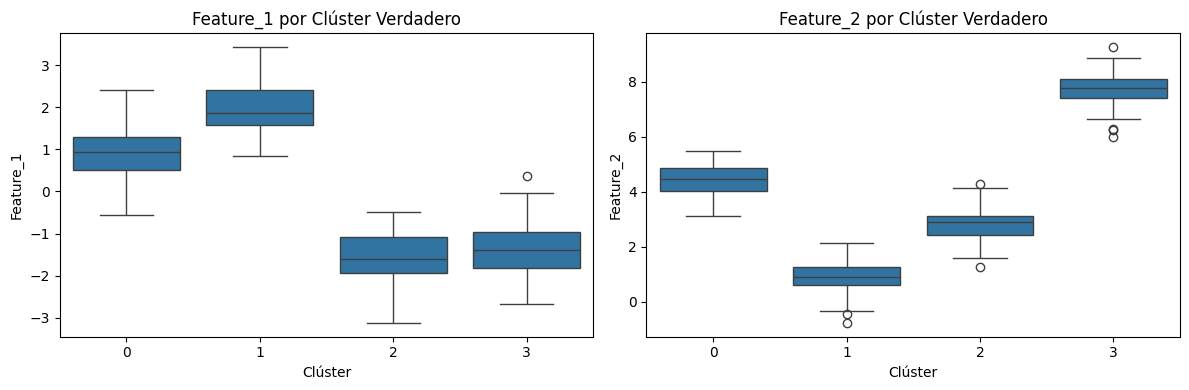

In [28]:
# 6. Boxplots por clúster verdadero
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x='True_Cluster', y='Feature_1', data=df)
plt.title('Feature_1 por Clúster Verdadero')
plt.xlabel('Clúster')
plt.ylabel('Feature_1')

plt.subplot(1, 2, 2)
sns.boxplot(x='True_Cluster', y='Feature_2', data=df)
plt.title('Feature_2 por Clúster Verdadero')
plt.xlabel('Clúster')
plt.ylabel('Feature_2')
plt.tight_layout()
plt.show()


=== Correlación entre características ===
           Feature_1  Feature_2
Feature_1   1.000000  -0.539387
Feature_2  -0.539387   1.000000


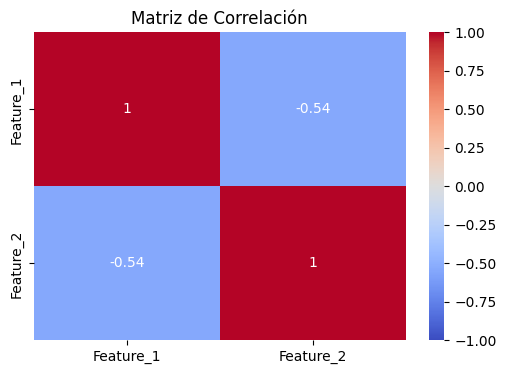

In [29]:
# 7. Correlación entre características
print("\n=== Correlación entre características ===")
correlation = df[['Feature_1', 'Feature_2']].corr()
print(correlation)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

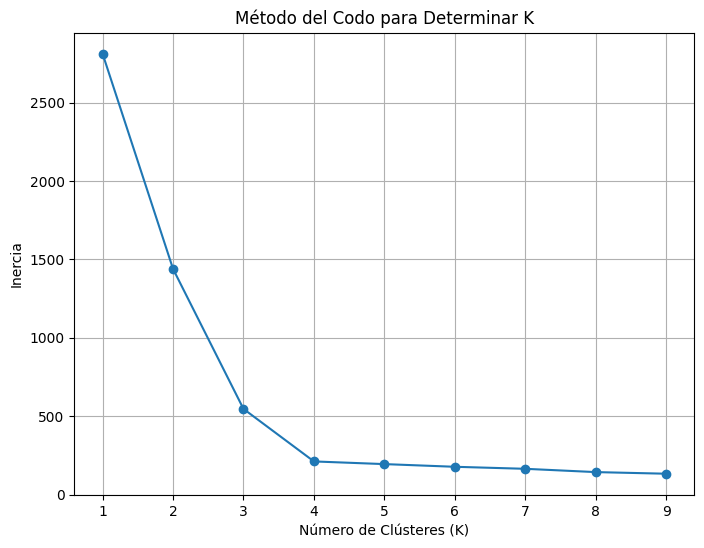

In [30]:
# 8. Análisis previo al clustering: Método del codo para determinar el número óptimo de clústeres
inertias = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, marker='o')
plt.title('Método del Codo para Determinar K')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [31]:
# 9. Aplicar K-Means (como en el código original)
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 0, 3, 0, 0,
       3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 3, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2,
       1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 2, 0, 3, 1, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 1, 3, 2, 3, 1, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1,
       2, 3, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 3, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3], d

In [32]:
from sklearn.cluster import KMeans
import numpy as np

# Suponiendo que X es tu matriz de datos (asegúrate de que X esté definida)
# Calcular la varianza total de los datos
total_variance = np.sum((X - np.mean(X, axis=0)) ** 2)

# Lista para almacenar los resultados
results = []

# Iterar sobre K = 3, 4, 5
for k in [3, 4, 5, 6, 7]:
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)

    # Obtener la inercia (within-cluster sum of squares)
    inertia = kmeans.inertia_

    # Calcular la varianza explicada
    explained_variance = 1 - (inertia / total_variance)

    # Almacenar los resultados
    results.append((k, explained_variance))

    # Imprimir resultados para cada K
    print(f"K={k}: Varianza explicada = {explained_variance:.4f}")

# Comparación
print("\nComparación:")
for k, ev in results:
    print(f"K={k}: Varianza explicada = {ev:.4f}")

K=3: Varianza explicada = 0.8055
K=4: Varianza explicada = 0.9246
K=5: Varianza explicada = 0.9307
K=6: Varianza explicada = 0.9367
K=7: Varianza explicada = 0.9413

Comparación:
K=3: Varianza explicada = 0.8055
K=4: Varianza explicada = 0.9246
K=5: Varianza explicada = 0.9307
K=6: Varianza explicada = 0.9367
K=7: Varianza explicada = 0.9413


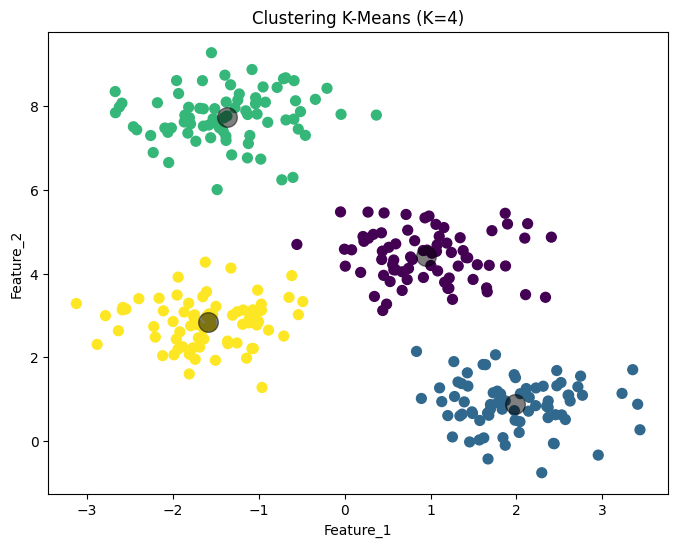

In [33]:
# 9. Aplicar K-Means (como en el código original)
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

# Visualizar los clústeres predichos
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clustering K-Means (K=4)')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.show()

In [36]:
from sklearn.metrics import silhouette_score

# Evaluar el clustering
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"\n=== Evaluación del Clustering ===")
print(f"Inercia: {inertia}")
print(f"Puntuación de la silueta: {silhouette_avg}")


=== Evaluación del Clustering ===
Inercia: 212.00599621083475
Puntuación de la silueta: 0.6819938690643478
